Importing all the necessary packages


In [80]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV , KFold , cross_val_score


In [81]:
#mounting the drive
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [82]:
#Path to the drive
DATA_DIR = Path("/content/drive/My Drive/Colab_Notebooks")

In [83]:
# import sample dataset
filename = DATA_DIR / "diamonds.csv"
diamond = pd.read_csv(filename)

##DATA UNDERSTANDING


In [84]:
#displaying the 1st 5 records
diamond.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [85]:
#checking the rows and columns present in the dataset
diamond.shape

(53940, 10)

In [86]:
#checking the data types of all columns
diamond.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

In [87]:
diamond.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [88]:
#Get the descriptive statistics of the dataset
diamond.describe()
#x,y,z has 0 as min value

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [89]:
#dropping data with x,y,z= 0 (no of records removed is 20)
diamond = diamond.loc[(diamond[['x','y','z']]!=0).all(axis=1)]
diamond.shape

(53920, 10)

In [90]:
#Running descriptive statistics step again to check the values after removing 20 records
diamond.describe()

,carat,depth,table,price,x,y,z
count,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
mean,0.797698,61.749514,57.456834,3930.993231,5.731627,5.734887,3.540046
std,0.473795,1.432331,2.234064,3987.280446,1.119423,1.140126,0.702530
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5323.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


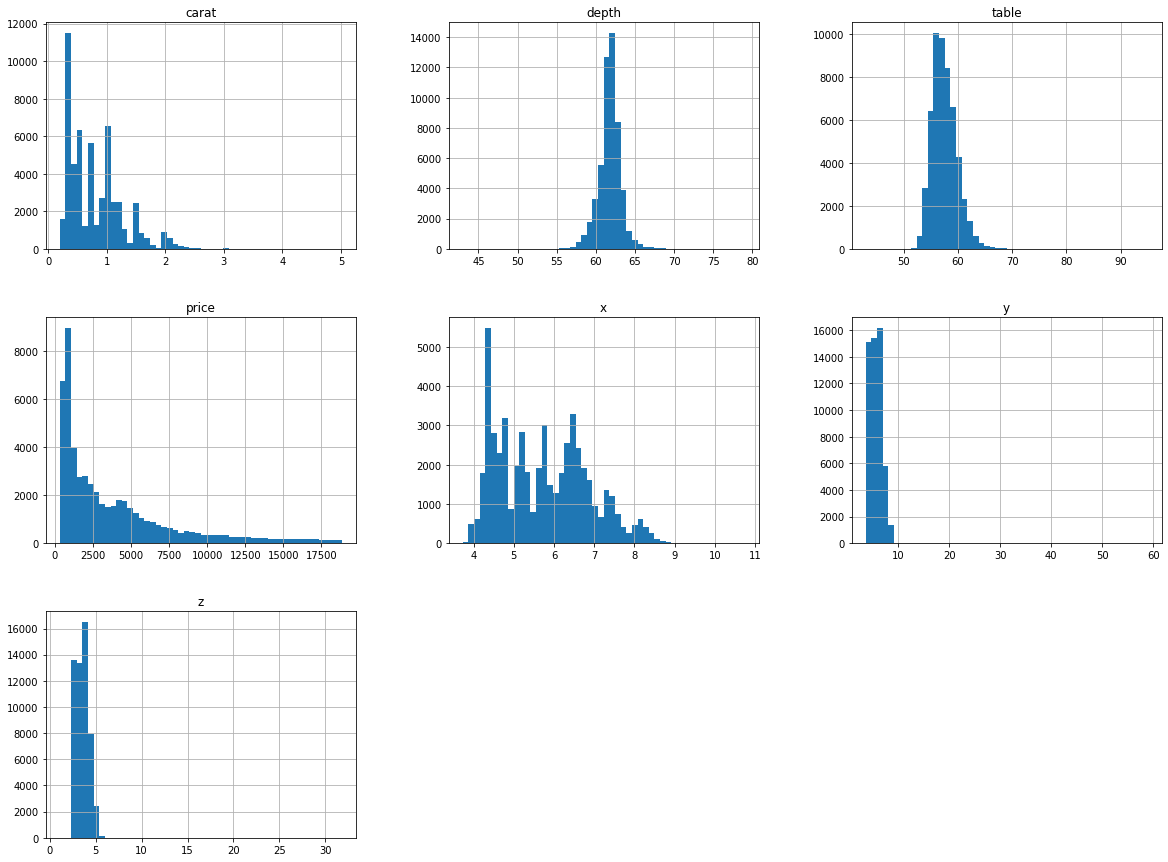

In [91]:
#plotting histograms to check the distribution
diamond.hist(bins=50,figsize=(20,15))
plt.show()

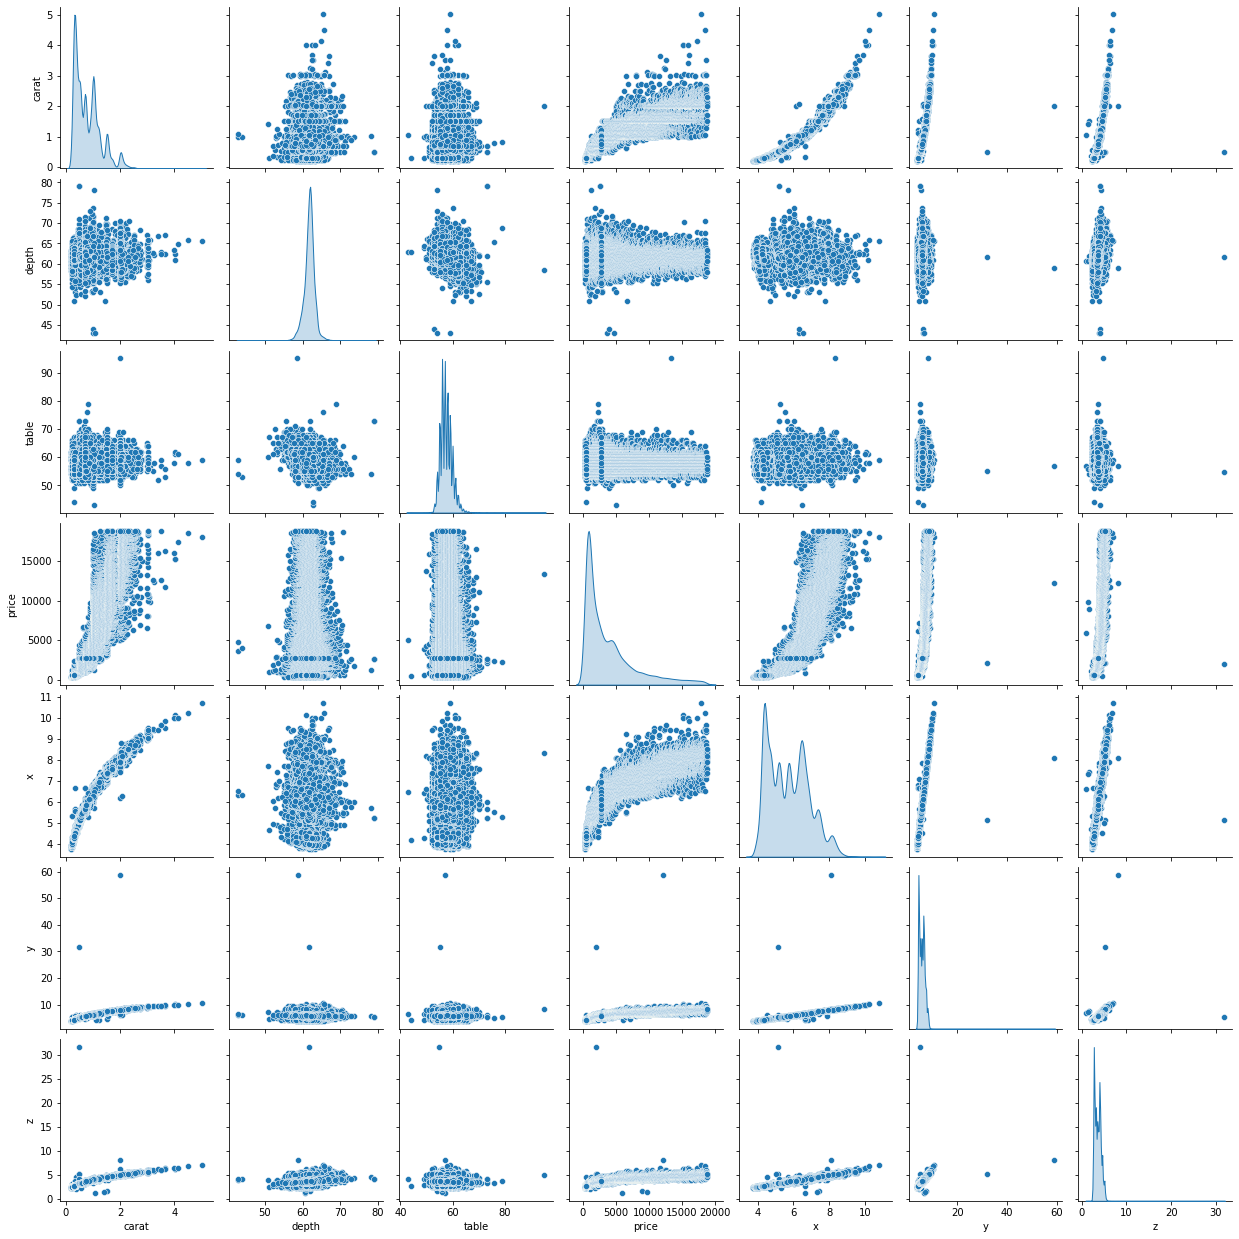

In [92]:
#USing pairplot to check the relationship and distribution of variables
sns.pairplot(diamond , diag_kind = 'kde');

In [93]:
#finding correlation between variables
cor=diamond.corr()
cor

,carat,depth,table,price,x,y,z
carat,1.000000,0.028259,0.181646,0.921592,0.977779,0.953991,0.961048
depth,0.028259,1.000000,-0.295733,-0.010729,-0.025017,-0.029069,0.095023
table,0.181646,-0.295733,1.000000,0.127245,0.196097,0.184493,0.152483
price,0.921592,-0.010729,0.127245,1.000000,0.887231,0.867864,0.868206
x,0.977779,-0.025017,0.196097,0.887231,1.000000,0.974918,0.975435
y,0.953991,-0.029069,0.184493,0.867864,0.974918,1.000000,0.956744
z,0.961048,0.095023,0.152483,0.868206,0.975435,0.956744,1.000000


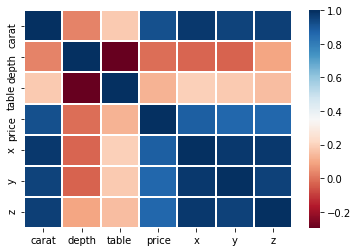

In [94]:
#correlation heatmap
sns.heatmap(cor,cmap='RdBu',linewidth=1)

Create New Feature 'Volume'


In [95]:

diamond['volume'] = diamond['x']*diamond['y']*diamond['z']
diamond.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,volume
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,38.202030
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,34.505856
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,38.076885
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,46.724580
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,51.917250


In [96]:
#dropping features x,y,z
diamond.drop(['x','y','z'], axis=1, inplace= True)


In [97]:
diamond.head()

,carat,cut,color,clarity,depth,table,price,volume
0,0.23,Ideal,E,SI2,61.5,55.0,326,38.202030
1,0.21,Premium,E,SI1,59.8,61.0,326,34.505856
2,0.23,Good,E,VS1,56.9,65.0,327,38.076885
3,0.29,Premium,I,VS2,62.4,58.0,334,46.724580
4,0.31,Good,J,SI2,63.3,58.0,335,51.917250


In [117]:
#analysing types of clarity
clarity_count=diamond.clarity.value_counts()
clarity_count

SI1     13063
VS2     12254
SI2      9185
VS1      8170
VVS2     5066
VVS1     3654
IF       1790
I1        738
Name: clarity, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


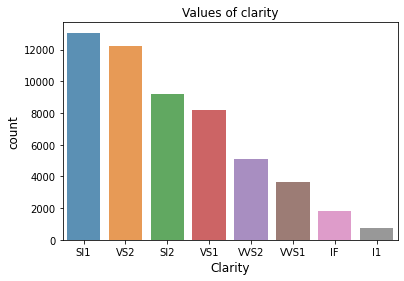

In [116]:
#Plotting Clarity values
sns.barplot(clarity_count.index, clarity_count.values, alpha=0.8)
plt.title('Values of clarity')
plt.ylabel('count', fontsize=12)
plt.xlabel('Clarity', fontsize=12)
plt.show()

In [118]:
#analysing types of colors
diamond_color=diamond.color.value_counts()
diamond_color

G    11284
E     9797
F     9538
H     8298
D     6774
I     5421
J     2808
Name: color, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


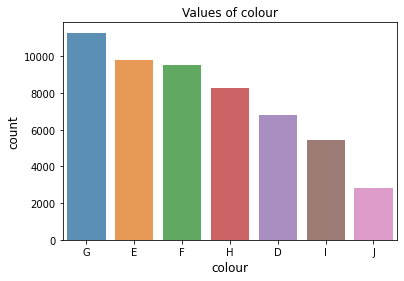

In [119]:
#Plotting Colors
sns.barplot(diamond_color.index, diamond_color.values, alpha=0.8)
plt.title('Values of colour')
plt.ylabel('count', fontsize=12)
plt.xlabel('colour', fontsize=12)
plt.show()

In [120]:
#analysing types of cuts
diamond_cut=diamond.cut.value_counts()
diamond_cut

Ideal        21548
Premium      13780
Very Good    12081
Good          4902
Fair          1609
Name: cut, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


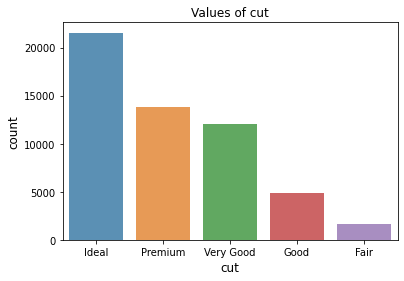

In [121]:
#Plotting types of Cut
sns.barplot(diamond_cut.index, diamond_cut.values, alpha=0.8)
plt.title('Values of cut')
plt.ylabel('count', fontsize=12)
plt.xlabel('cut', fontsize=12)
plt.show()

Outlier Analysis

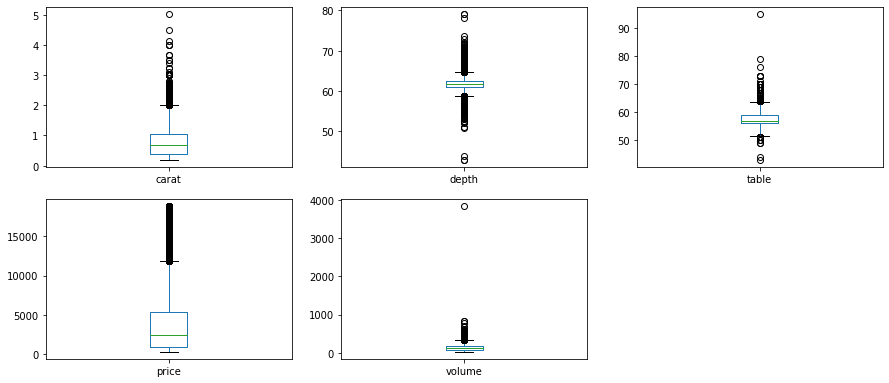

In [122]:
#to analyse the outlier
diamond.plot(kind='box',figsize=(15,10),subplots=True,layout=(3,3))
plt.show()

In [123]:
#code to remove outliers
def outliers(var):
    a = []
    q1 = diamond[var].quantile(.25)
    q2 = diamond[var].quantile(.5)
    q3 = diamond[var].quantile(.75)
    iqr = q3-q1
    ulim = float(q3+(1.5*iqr))
    llim = float(q1-(1.5*iqr))

    for i in diamond[var]:
        if i > ulim:
            i = np.NaN
        elif i < llim:
            i = np.NaN
        else:
            i=i
        a.append(i)
    return a

for col in diamond.select_dtypes(exclude='object').columns:
    diamond[col] = outliers(col)

In [124]:
#code to show outliers
for i in diamond.select_dtypes(exclude='object').columns:
    diamond[i] = diamond[i].fillna(diamond[i].mean())

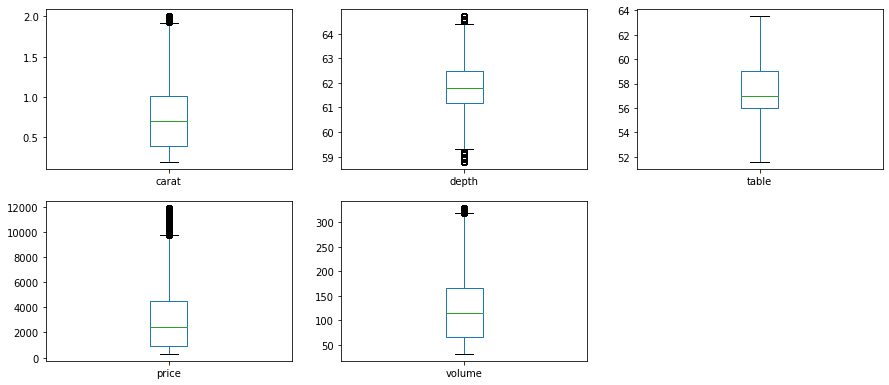

In [125]:
#to check the output of outliers
diamond.plot(kind='box',figsize=(15,10),subplots=True,layout=(3,3))
plt.show()

##DATA PREPARATION

In [126]:
#finding null values or missing values
diamond.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
volume     0
dtype: int64

In [127]:
#one hot encoding for categorical variables
Onehot1 = pd.get_dummies(diamond['clarity'])
Onehot2 = pd.get_dummies(diamond['color'])
Onehot3 = pd.get_dummies(diamond['cut'])
df_diamond = pd.concat([diamond,Onehot1,Onehot2,Onehot3],axis = 1)
df_diamond = df_diamond.drop(['clarity','color','cut'],axis=1)
df_diamond.head()

,carat,depth,table,price,volume,I1,IF,SI1,SI2,VS1,VS2,VVS1,VVS2,D,E,F,G,H,I,J,Fair,Good,Ideal,Premium,Very Good
0,0.23,61.500000,55.000000,326.0,38.202030,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
1,0.21,59.800000,61.000000,326.0,34.505856,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
2,0.23,61.776344,57.373199,327.0,38.076885,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
3,0.29,62.400000,58.000000,334.0,46.724580,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4,0.31,63.300000,58.000000,335.0,51.917250,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0


In [128]:
df_diamond.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53920 entries, 0 to 53939
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   carat      53920 non-null  float64
 1   depth      53920 non-null  float64
 2   table      53920 non-null  float64
 3   price      53920 non-null  float64
 4   volume     53920 non-null  float64
 5   I1         53920 non-null  uint8  
 6   IF         53920 non-null  uint8  
 7   SI1        53920 non-null  uint8  
 8   SI2        53920 non-null  uint8  
 9   VS1        53920 non-null  uint8  
 10  VS2        53920 non-null  uint8  
 11  VVS1       53920 non-null  uint8  
 12  VVS2       53920 non-null  uint8  
 13  D          53920 non-null  uint8  
 14  E          53920 non-null  uint8  
 15  F          53920 non-null  uint8  
 16  G          53920 non-null  uint8  
 17  H          53920 non-null  uint8  
 18  I          53920 non-null  uint8  
 19  J          53920 non-null  uint8  
 20  Fair  

In [129]:
#splitting the data in 80% train and 20% test
y = df_diamond['price']
X = df_diamond.drop(['price'],axis=1)
X.head()
X.shape
y.shape
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.20)
sc = StandardScaler()#standardization
scaledX_train = sc.fit_transform(X_train)
scaledX_test = sc.transform(X_test)
scaledX_train.shape #(values xtrain(43136, 25))
scaledX_test.shape #(values xtest(10784, 25))


(10784, 24)

##Modelling


Linear Regression

In [130]:
regr = LinearRegression()
model = regr.fit(scaledX_train, y_train)
y_pred = model.predict(scaledX_test)

print("RMSE: {}".format(np.sqrt(mean_squared_error((y_test),(y_pred)))))
print("R2  : {}".format(np.sqrt(r2_score((y_test),(y_pred)))))

RMSE: 1463.7455226567424
R2  : 0.8361756465579584


Random Forest

In [131]:
rr  = RandomForestRegressor()
rr.fit(scaledX_train,y_train)
y_pred = rr.predict(scaledX_test)

print("RMSE: {}".format(np.sqrt(mean_squared_error((y_test),(y_pred)))))
print("R2  : {}".format(np.sqrt(r2_score((y_test),(y_pred)))))

RMSE: 811.9640569361343
R2  : 0.952595132881243


Improving results using GridSearchCV

In [132]:
n_estimators = [int(x) for x in np.linspace(10,200,10)]
max_depth = [int(x) for x in np.linspace(10,100,10)]
min_samples_split = [2,3,4,5,10]
min_samples_leaf = [1,2,4,10,15,20]
random_grid = {'n_estimators':n_estimators,'max_depth':max_depth,
               'min_samples_split':min_samples_split,'min_samples_leaf':min_samples_leaf}

random_grid

{'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
 'min_samples_leaf': [1, 2, 4, 10, 15, 20],
 'min_samples_split': [2, 3, 4, 5, 10],
 'n_estimators': [10, 31, 52, 73, 94, 115, 136, 157, 178, 200]}

In [133]:
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator=rf,
                               param_distributions=random_grid,
                               cv = 3)

rf_random.fit(scaledX_train,y_train)
y_pred = rf_random.predict(scaledX_test)

print("RMSE: {}".format(np.sqrt(mean_squared_error((y_test),(y_pred)))))
print("R2  : {}".format(np.sqrt(r2_score((y_test),(y_pred)))))

RMSE: 812.3775670471888
R2  : 0.9525456337060118


In [134]:
rf_random.best_params_

{'max_depth': 20,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 73}

In [135]:
rf = RandomForestRegressor(n_estimators=73,
                         min_samples_split=3,
                         min_samples_leaf=4,
                         max_depth=40)
rf.fit(scaledX_train,y_train)
y_pred = rf.predict(scaledX_test)

print("RMSE: {}".format(np.sqrt(mean_squared_error((y_test),(y_pred)))))
print("R2  : {}".format(np.sqrt(r2_score((y_test),(y_pred)))))

RMSE: 819.9636430759468
R2  : 0.9516326099797883


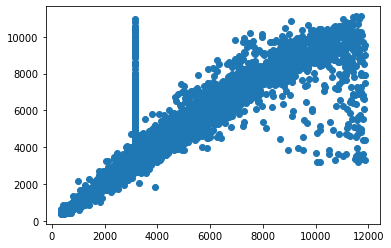

In [136]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


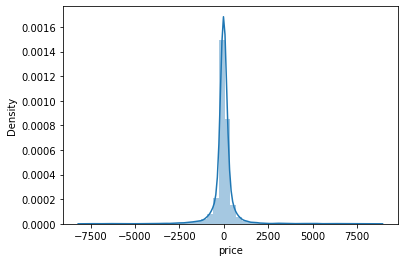

In [137]:
import seaborn as sns
sns.distplot((y_test-y_pred),bins=50);